### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Badminton']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 15626    Badminton
15627    Badminton
15628    Badminton
15629    Badminton
15630    Badminton
           ...    
16094    Badminton
16095    Badminton
16096    Badminton
16097    Badminton
16098    Badminton
Name: Sport, Length: 473, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 15626    NA
15627    NA
15628    NA
15629    NA
15630    NA
         ..
16094    NA
16095    NA
16096    NA
16097    NA
16098    NA
Name: Medal, Length: 473, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 15626 to 16098
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      473 non-null    int64  
 1   Unnamed: 0_x    473 non-null    int64  
 2   ID              473 non-null    int64  
 3   Name            473 non-null    object 
 4   Sex             473 non-null    object 
 5   Age             473 non-null    float64
 6   Height          473 non-null    float64
 7   Weight          473 non-null    float64
 8   NOC             473 non-null    object 
 9   Games           473 non-null    object 
 10  Year            473 non-null    int64  
 11  Season          473 non-null    object 
 12  City            473 non-null    object 
 13  Sport           473 non-null    object 
 14  Event           473 non-null    object 
 15  Medal           473 non-null    object 
 16  Team            473 non-null    object 
 17  Unnamed: 0_y    473 non-null 

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (354, 1) (354, 6)
Test Set  : (119, 1) (119, 6)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
15628,27.0,68.0,177.0,1.340000e+12,4.677306e+07,28648.973218,NA
15864,26.0,73.0,182.0,5.620000e+11,4.701000e+07,11954.903212,NA
16076,28.0,65.0,177.0,4.820000e+12,1.277610e+08,37726.692809,NA
16069,27.0,69.0,176.0,2.970000e+11,5.607283e+06,52966.829033,NA
15775,22.0,80.0,180.0,4.600000e+12,1.324655e+09,3472.602300,Bronze
...,...,...,...,...,...,...,...
15895,22.0,80.0,189.0,1.720000e+11,3.825863e+07,4495.717816,NA
16003,25.0,75.0,184.0,1.040000e+11,4.087500e+06,25443.425076,NA
15815,21.0,75.0,178.0,3.980000e+11,6.784398e+07,5866.401203,NA
15782,32.0,72.0,174.0,1.640000e+11,5.339616e+06,30713.819121,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        413
Gold       20
Bronze     20
Silver     20
Name: Medal, dtype: int64


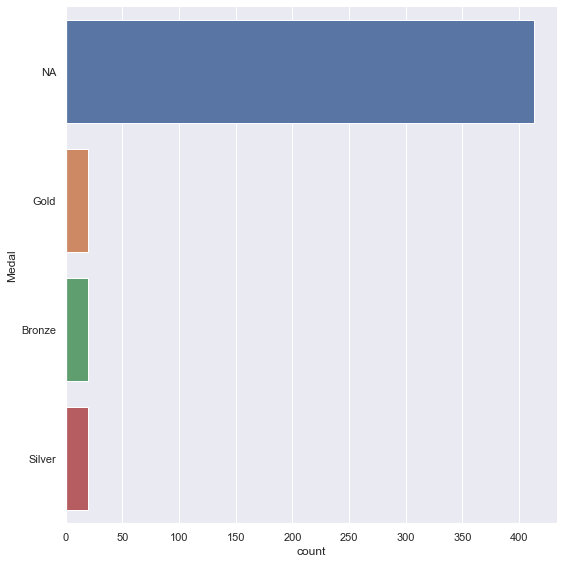

In [13]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(354, 6) (354, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1224, 6) (1224, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,27.000000,68.000000,177.000000,1.340000e+12,4.677306e+07,28648.973218,NA
1,26.000000,73.000000,182.000000,5.620000e+11,4.701000e+07,11954.903212,NA
2,28.000000,65.000000,177.000000,4.820000e+12,1.277610e+08,37726.692809,NA
3,27.000000,69.000000,176.000000,2.970000e+11,5.607283e+06,52966.829033,NA
4,22.000000,80.000000,180.000000,4.600000e+12,1.324655e+09,3472.602300,Bronze
...,...,...,...,...,...,...,...
1219,31.881648,74.723846,184.408241,3.264871e+11,6.521773e+06,56598.424463,Silver
1220,26.576092,62.304369,167.864138,1.760000e+11,2.115404e+08,831.992262,Silver
1221,29.000000,71.807202,180.018004,5.600743e+11,2.820107e+07,35828.025282,Silver
1222,29.953906,72.963124,181.917030,7.631286e+11,4.807014e+07,15874.511056,Silver


In [17]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
15983,23.0,82.0,187.0,1.650000e+12,5.889251e+07,28017.143231
15844,22.0,92.0,192.0,2.360000e+11,1.038460e+07,22725.953029
15902,25.0,72.0,172.0,2.950000e+11,5.590886e+07,5276.444084
16096,24.0,75.0,181.0,3.750000e+12,8.211010e+07,45670.388138
15652,27.0,79.0,179.0,7.420000e+11,3.076970e+07,24114.632252
...,...,...,...,...,...,...
15816,37.0,79.0,187.0,2.600000e+11,8.872109e+06,29305.320753
15692,22.0,91.0,173.0,1.860000e+13,3.231275e+08,57562.414996
15741,24.0,78.0,181.0,4.600000e+12,1.324655e+09,3472.602300
16012,20.0,79.0,182.0,5.620000e+11,4.701000e+07,11954.903212


Number of Medal Types : 4
Bronze    306
Gold      306
NA        306
Silver    306
Name: Medal, dtype: int64


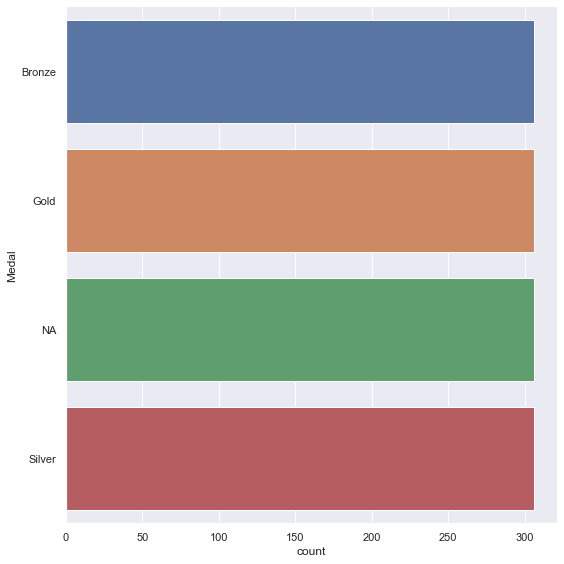

In [18]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (918, 1) (918, 6)
Test Set  : (306, 1) (306, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9956427015250545

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9379084967320261



<AxesSubplot:>

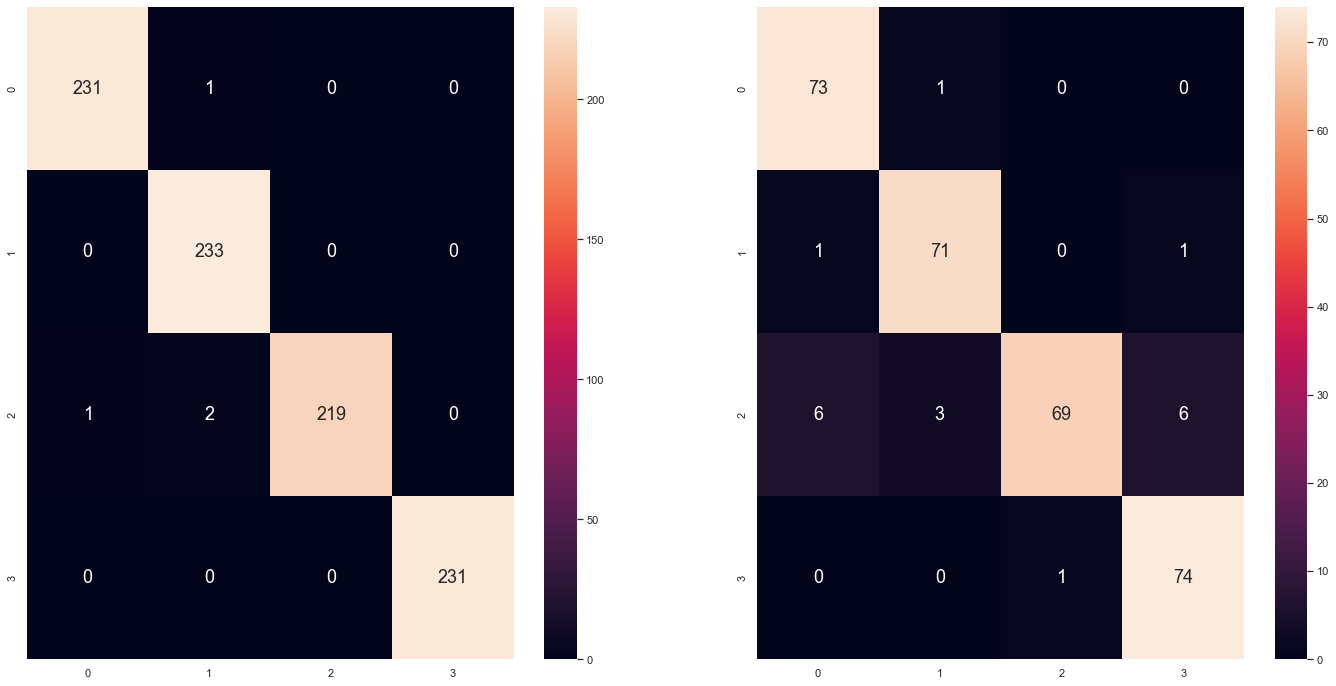

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 12)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

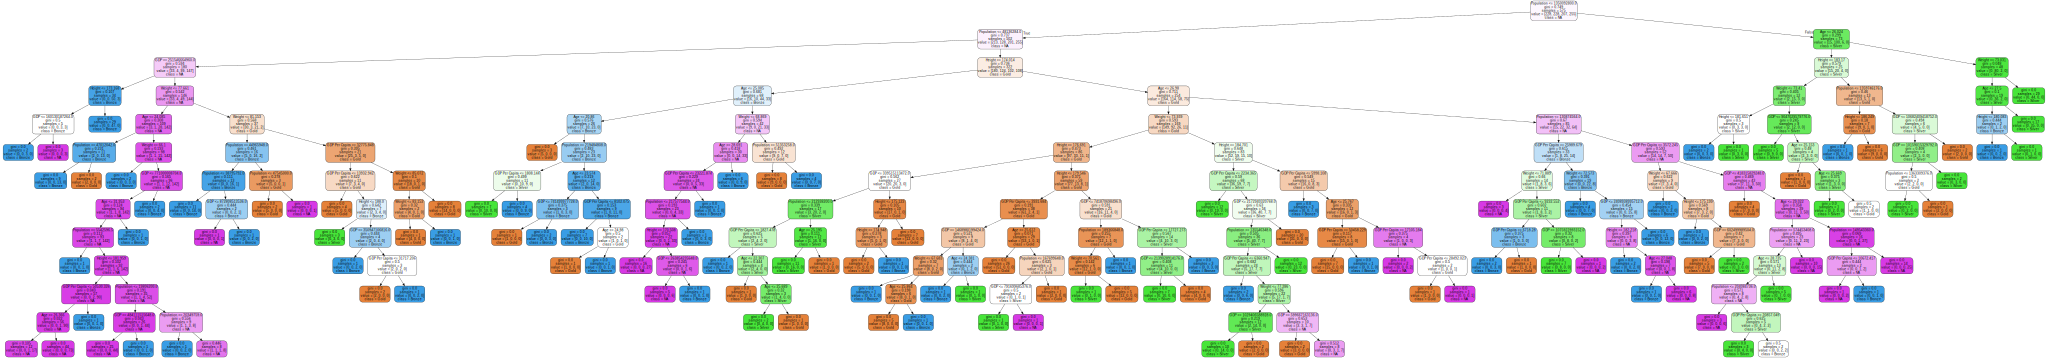

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
#graph.render("Tree_new")

### Predictions

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.8067226890756303


<AxesSubplot:>

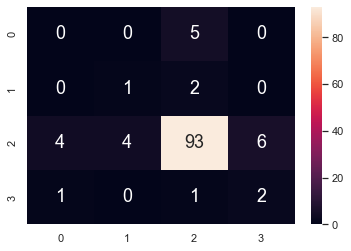

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})